# ***Linear Regression***

**Javier Mauricio Sierra.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
##
from sklearn.model_selection import train_test_split      ## Para dividir el Dataset en Train y Test 
from sklearn.metrics import mean_squared_error, r2_score  ## Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_error           ## Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_percentage_error## Para obtener las métricas de evaluación.
from sklearn.linear_model import LinearRegression         ## Modelo lineal.
## Parte estadística.
import statsmodels.formula.api  as smf                                 ## Modelos lineal.
from scipy.stats import shapiro, probplot, f, f_oneway                 ## libreria estadistica de Scipy
from statsmodels.stats.anova import anova_lm                           ## Anova del modelo lineal
##
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
#url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"

# ***Regresión lineal simple.***

Consideremos la siguiente situación:

Se ha recolectado información sobre 122 individuos, cada uno de ellos respondió por:


1. ***`Exposure`:*** Numéro de mese que el trabajador estuvo expuesto al polvo de algodón.

2. ***`PEFR`:*** Proporciona una medida de la capacidad pulmonar del trabajador ([tasa de flujo respiratorio](https://en.wikipedia.org/wiki/Peak_expiratory_flow)).

***¿Cómo se relaciona el `PEFR` con `Exposure`?***

In [12]:
#data = "LM_simple_example_1.csv"
#df = pd.read_csv(url_base+data,)
df = pd.read_csv("LungDisease.csv",)
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [14]:
df['Exposure'].value_counts()

Exposure
20    22
19    13
21    10
13     8
7      7
17     6
3      6
4      6
22     6
14     6
6      5
0      4
18     4
2      3
10     3
15     3
12     2
16     2
23     2
1      1
9      1
8      1
5      1
Name: count, dtype: int64

Primero veamos la relación vía un scatterplot:

In [1]:
sns.set_style("whitegrid")

# Crea la gráfica de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Exposure", y="PEFR", data=df)

# Configura el título y los etiquetas de los ejes
plt.title("Scatterplot: Exposure vs. PEFR")
plt.xlabel("Exposure")
plt.ylabel("PEFR")

# Muestra la gráfica
plt.show()

NameError: name 'sns' is not defined

In [16]:
corr_coef = df.corr().iloc[0,1]
print("El coeficiente de correlación de Pearson es: {:.4f}".format(corr_coef))

El coeficiente de correlación de Pearson es: -0.2770


In [17]:
corr_coef**2

0.07674102286283403

Recordemos que la ***regresión lineal simple*** estima cuánto cambiará `PERF` cuando `Exposure` cambie en un
cierta cantidad. Es decir, deseamos explicar si las diferencias en los niveles de `PERF` se asocian con las diferencias en los años de exposición (`Exposure`). Nuestro modelo será en este caso:


$$PERF = \beta_0 +\beta_1*\text{Exposure}+\epsilon$$ 

$\beta_0$ es una constante conocida como 
el intercepto, $\beta_1$ será la pendiente, ambos de denominan parámetros de la regresión. $\epsilon$ es un error o ruido que NO se logra explicar con el modelo. La ***regresión lineal simple*** trata de encontrar la "mejor" recta para predecir la variable ***Target*** `PEFR` como una función de la ***feature*** `Exposure`



Hacemos uso de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [18]:
## Ajuste de regresión con sklearn
model_lm = LinearRegression()
###
y = df["PEFR"]                                            ## Target.
X = df.drop(columns = ["PEFR"])                           ## Feature.
model_lm.fit(X = X, y = y)
##
print(f"Intercepto: {model_lm.intercept_:.3f}")
print(f"Coeficiente Exposure: {model_lm.coef_[0]:.3f}")

Intercepto: 424.583
Coeficiente Exposure: -4.185


En caso que seleccionemos este ajuste muestro modelo será:

$$PEFR = 424.583-4.185*Exposure+\epsilon$$

La interpretación de los coeficientes es la siguiente:

1. $\hat{\beta_0}=424.583$: Es el intercepto del modelo, note que para un valor de $Exposure=0$, se obtiene que $PEFR=424.583$, así, se espera que un trabajador sin exposición tenga ese valor medio del indicador de respiración.

2. $\hat{\beta_1}=-4.185$: Por cada aumento unitario en la variable $Exposure$ se espera que $PEFR$ disminuya en promedio el valor en $\hat{\beta_1}$

Veamos la recta de ajuste:

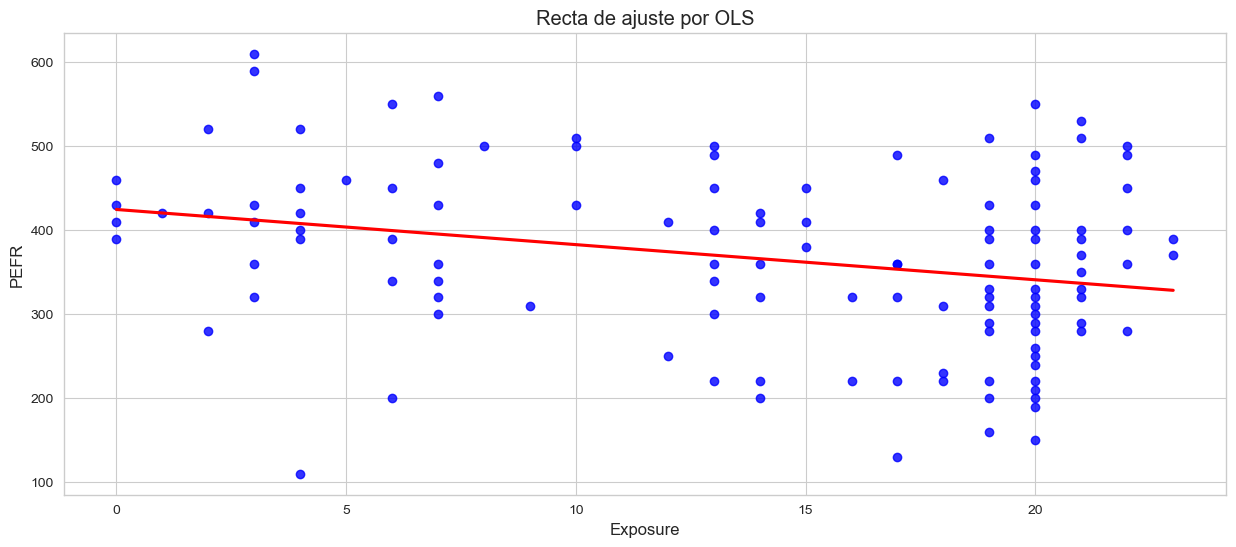

In [19]:
sns.set_style("whitegrid")

# Crea la gráfica de dispersión con la recta de ajuste por OLS
sns.regplot(x="Exposure", y="PEFR", data=df, ci=None, color="red", scatter_kws={"color": "blue"})

plt.title("Recta de ajuste por OLS")
plt.xlabel("Exposure")
plt.ylabel("PEFR")

plt.show()

### ***Valores ajustados y residuales.***

Los conceptos importantes en el análisis de regresión son los valores ajustados (las predicciones con el modelo) y los residuales (errores de predicción). En general, para $Y$ variable target y $X$ variable explicativa o (feature para predicir), los datos no caen exactamente en la recta de ajuste, por lo que la ecuación de regresión debe incluir un término de error explícito $\epsilon_i$


$$Y_i=\beta_0+\beta_1*X+ϵ_i$$


Los ***valores ajustados***, denotados por $\hat{Y_i}$ vienes dados por la expresión:


$$\hat{Y_i}=\hat{\beta_0}+\hat{\beta_1}*X_i$$


Calculamos los residuos estimados ($\hat{\epsilon_i}$) mediante:


$$\hat{\epsilon_i}=Y_i-\hat{Y_i}$$

In [20]:
### With sklearn
fitted = model_lm.predict(X) ### Valores ajustados Yi^
resid = y - fitted           ### Residuales estimados.

In [21]:
### pd.DataFrame con los primeros resultados del ajuste
pd.DataFrame({"valor_observado":y, "valor_ajustado":fitted,"residual":resid})

,valor_observado,valor_ajustado,residual
0,390,424.582807,-34.582807
1,410,424.582807,-14.582807
2,430,424.582807,5.417193
3,460,424.582807,35.417193
4,420,420.398230,-0.398230
...,...,...,...
117,450,332.522124,117.477876
118,490,332.522124,157.477876
119,500,332.522124,167.477876
120,370,328.337547,41.662453


## ***Anova***

Dado que queremos explicar la variabilidad de la variable `Target` con respecto a su media podemos descomponerla de la siguiente manera:

$$\sum_{i=1}^{n}(y_i-\bar{y})^{2}=\sum_{i=1}^{n}(y_i-\hat{y_i})^{2}+\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$

En la expresión expresión anterior se identifican:

1. ***Suma de cuadrados totales***:

$$SCT = \sum_{i=1}^{n}(y_i-\bar{y})^{2}$$

Esta suma determina la variabilidad respecto a su media.

2. ***Suma de cuadrados del error:***

$$SCE=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}$$

Esta  suma toma en cuenta la variación con la recta estimada. La variación residual que queda sin explicar por la recta de regresión.
  
3. ***Suma de cuadrados de la regresión:***
$$SCR=\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$

La cantidad de variabilidad en las observaciones explicada por la recta regresión. Esta suma toma en cuenta la variación de las observaciones y es atribuible al efecto lineal del modelo.


In [22]:
## With statsmodels. from statsmodels.stats.anova import anova_lm ---> Anova del modelo lineal   
model_lm_sm = smf.ols(formula = "PEFR ~ Exposure", data = df).fit()     ## Ajuste con statsmodels.
#print(model_lm_sm.summary())
anova_lm(model_lm_sm, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Exposure,1.0,1.026333e+05,102633.255269,9.974366,0.002008
Residual,120.0,1.234764e+06,10289.702381,NaN,NaN


***La tabla anterior es una típica ANOVA***. 

El estadístico $F_{1}^{n-2}$ se utiliza para contrastar el sistema de hipótesis:

$$H_0:\beta_1=0$$
$$vs.$$
$$H_1:\beta_1\neq 0$$

Es decir, este ***mide la pertinencia o no del modelo (Significancia global del modelo).***

Para el caso específico de nuestro problema el $p$-valor de la prueba es $0.002008$, es decir, ***podemos explicar las diferencias en la variable `PEFR` con las diferencias existentes en la variable `Exposure`.***

### ***Coeficiente de determinación.***

El coeficiente de determinación se encuentra con la fórmula:

$$R^{2}=\frac{SCR}{SCT}=1-\frac{SCE}{SCT}$$

Al ser $SCT$ una medida de la variabilidad de $Y$ sin considerar el efecto de la variable regresora y $SCE$ es una medida de la variabilidad de $Y$ que queda después de haber tenido en consideración a $X$, el coeficiente de determinación, $R^{2}$ se llama con frecuencia la proporción de la variación explicada por el regresor $X$. Este valor va de 0 y hasta 1, valores cercanos a 1 implican que la mayor parte de la variabilidad de $Y$ está explicada por el modelo de regresión.

In [23]:
###
SCE = 1.234764e+06                      ## Suma de cuadrados del error.
SCR = 1.026333e+05	                    ## Suma de cuadrados de la regresión.
SCT = (1.234764e+06+1.026333e+05)
R_2 = 1- SCE/SCT
print("El valor de R^2 es: {:.4f}".format(R_2))
print("Por lo tanto el {:.2f}% de la variabilidad de PEFR queda explicada por el modelo.".format(R_2*100))
###
print()
print("R^2 Con sklearn:", model_lm.score(X,y))
### Con statsmodels
print()
print("Suma de cuadrados del error:", model_lm_sm.ssr)
print("Suma de cuadrados de la regresión:", model_lm_sm.mse_model)
print("Suma de cuadrados totales:", model_lm_sm.centered_tss)
print("R^2 con statsmodels:", model_lm_sm.rsquared)

El valor de R^2 es: 0.0767
Por lo tanto el 7.67% de la variabilidad de PEFR queda explicada por el modelo.

R^2 Con sklearn: 0.0767410228628338

Suma de cuadrados del error: 1234764.285714286
Suma de cuadrados de la regresión: 102633.25526932045
Suma de cuadrados totales: 1337397.5409836064
R^2 con statsmodels: 0.07674102286283369


## ***Análisis de residuales***

1. Debemos verificar que los residuales no estén correlacionados.
2. Homocedasticidad.
3. Que los residuales distribuyan aproximadamente normal


En primera medida debemos estimar el valor de $\sigma^{2}$, este valor está dado por la expresión:

$$\hat{\sigma}^{2}=\frac{SCE}{n-1}$$

***Que no es otra cosa que el cuadrado medio del error.***



In [24]:
## Estimación de sigma^2.
sigma_2 = 10289.702381
print("La estimación de la variabilidad del modelo es:", sigma_2)
## Estimación de sigma^2 con statsmodels.
print("La estimación de sigma^2 con statsmodels es:",model_lm_sm.scale)

La estimación de la variabilidad del modelo es: 10289.702381
La estimación de sigma^2 con statsmodels es: 10289.702380952383


In [25]:
## Medidas de influencia.
influence_model = model_lm_sm.get_influence()
print(influence_model.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    390.000    424.583      0.003     -0.348      0.042     -0.073     -0.347     -0.073
         1    410.000    424.583      0.000     -0.147      0.042     -0.031     -0.146     -0.031
         2    430.000    424.583      0.000      0.055      0.042      0.011      0.054      0.011
         3    460.000    424.583      0.003      0.357      0.042      0.075      0.355      0.074
         4    420.000    420.398      0.000     -0.004      0.037     -0.001     -0.004     -0.001
         5    280.000    416.214      0.032     -1.366      0.033     -0.253     -1.371     -0.254
         6    420.000    416.214      0.000      0.038      0.033      0.007      0.038      0.007
         7

In [26]:
## Residuales studentizados. h_ii
h_ii = influence_model.hat_diag_factor
##
resid/(np.sqrt(sigma_2*(1 - h_ii)))

0     -0.348659
1     -0.147022
2      0.054615
3      0.357071
4     -0.004004
         ...   
117    1.169438
118    1.567619
119    1.667165
120    0.415365
121    0.614760
Name: PEFR, Length: 122, dtype: float64

In [27]:
df_model = df.copy()
df_model["registro"] = [x for x in range(1,len(df)+1)]
df_model["valor_ajustado"] =  model_lm_sm.predict()
df_model["residuales"] = model_lm_sm.resid.values
df_model["valor_observado"] = df['PEFR']
df_model["Distancia_cook"] = influence_model.cooks_distance[0]
## Residuos estandarizados -----> "resid_studentized_internal"
df_model["residuales_standarized"] = influence_model.resid_studentized_internal
df_model.head()

,PEFR,Exposure,registro,valor_ajustado,residuales,valor_observado,Distancia_cook,residuales_standarized
0,390,0,1,424.582807,-34.582807,390,2.661589e-03,-0.348324
1,410,0,2,424.582807,-14.582807,410,4.732633e-04,-0.146880
2,430,0,3,424.582807,5.417193,430,6.530843e-05,0.054563
3,460,0,4,424.582807,35.417193,460,2.791572e-03,0.356728
4,420,1,5,420.398230,-0.398230,420,3.109967e-07,-0.004001


<Axes: >

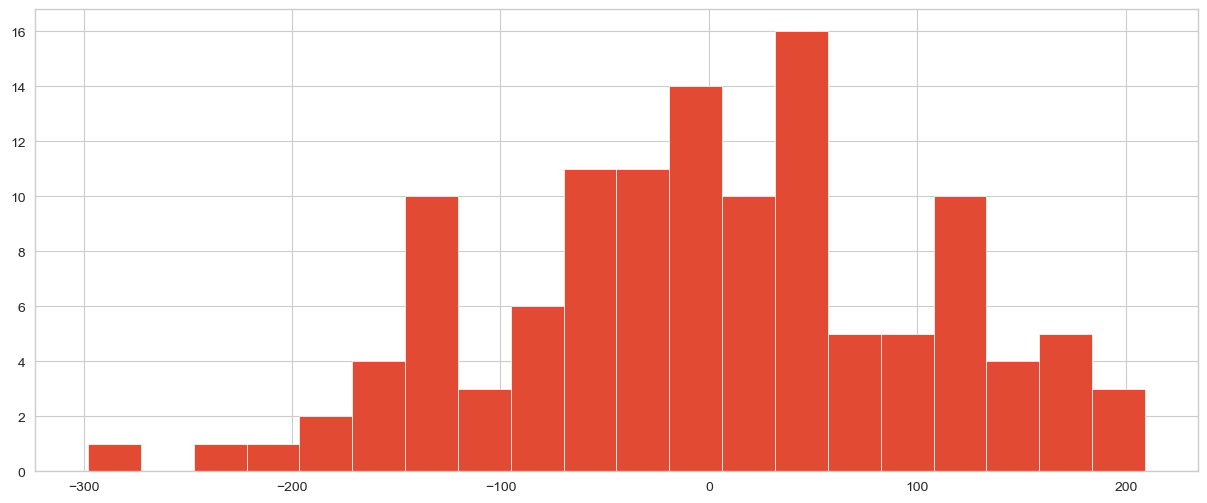

In [28]:
df_model['residuales'].hist(bins=20)

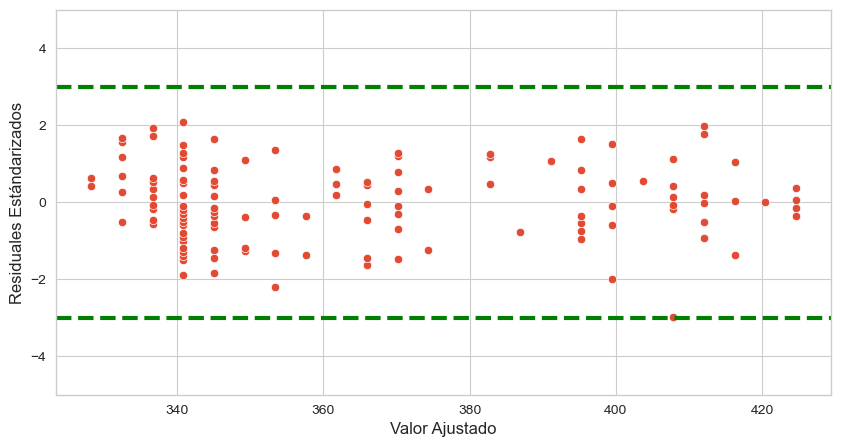

In [29]:
### En este plot podemos verificar tanto valor influyentes (por fuera de la franja de -3 a 3)
### Además se puede "verificar" si la varianza es constante o no. NO lo será si los puntos del 
### plot tienen un patrón.
sns.set_style("whitegrid")

# Crea la gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x="valor_ajustado", y="residuales_standarized", data=df_model)

# Agrega las líneas horizontales
plt.axhline(y=3, color="green", linewidth=3, linestyle="--")
plt.axhline(y=-3, color="green", linewidth=3, linestyle="--")

# Configura el rango de los ejes y
plt.ylim(-5, 5)

# Configura los títulos y etiquetas de los ejes
plt.xlabel("Valor Ajustado")
plt.ylabel("Residuales Estándarizados")

# Muestra la gráfica
plt.show()

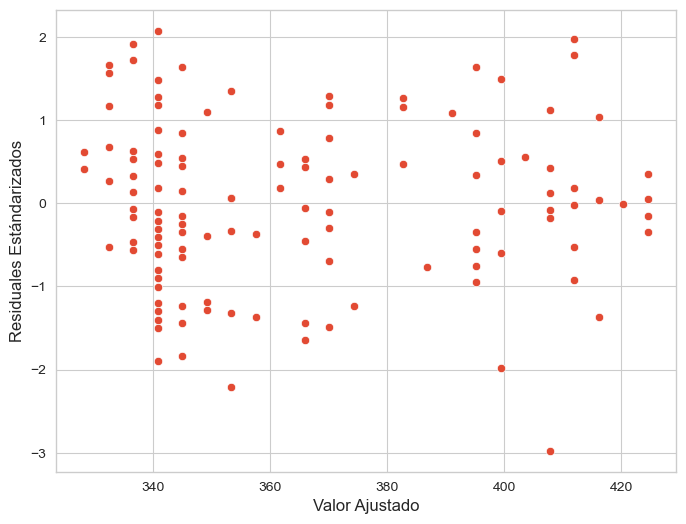

In [30]:
### Problemas de varinza no constante. OJO ---> Algún patrón.
sns.set_style("whitegrid")

# Crea la gráfica de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x="valor_ajustado", y="residuales_standarized", data=df_model)

# Configura los títulos y etiquetas de los ejes
plt.xlabel("Valor Ajustado")
plt.ylabel("Residuales Estándarizados")

# Muestra la gráfica
plt.show()

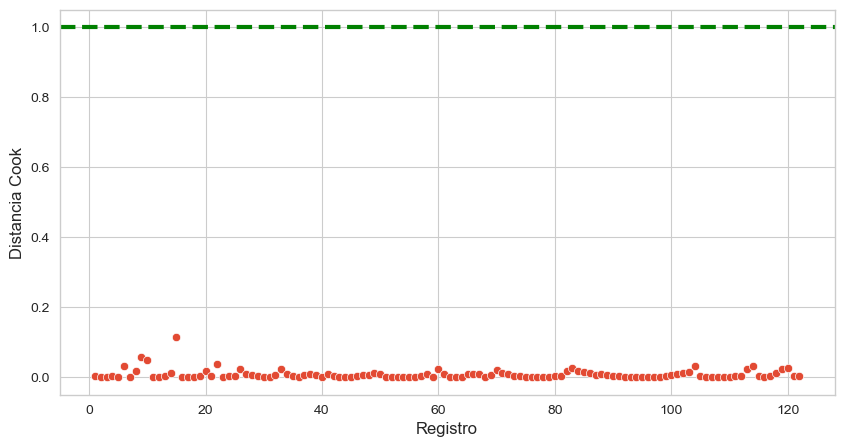

In [31]:
### Distancia de cook.
sns.set_style("whitegrid")

# Crea la gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x="registro", y="Distancia_cook", data=df_model)

# Agrega la línea horizontal
plt.axhline(y=1, color="green", linewidth=3, linestyle="--")

# Configura los títulos y etiquetas de los ejes
plt.xlabel("Registro")
plt.ylabel("Distancia Cook")

# Muestra la gráfica
plt.show()

### ***Normalidad.***

In [25]:
## NORMALIDAD: Test de Shapiro-Wills
## La prueba de Shapiro-Wilk prueba la hipótesis nula de que los datos se extrajeron 
## de una distribución normal.
p_value1 = shapiro(df["PEFR"])[1]                                   ### Normalidad variable respuesta
print("El p-valor del Test de Shapiro-Wills para la variable respuesta es: {:.3f}".format(p_value1))
### Anderson-Darly
p_value2 = shapiro(resid)[1]
print("El p-valor del Test de Shapiro-Wills para normalidad de los residuales:{:.3f}".format(p_value2))

El p-valor del Test de Shapiro-Wills para la variable respuesta es: 0.541
El p-valor del Test de Shapiro-Wills para normalidad de los residuales:0.586


Luego no podemos rechazar la hipótesis nula, por lo tanto no tenemos evidencia estadística para decir que los residuales no distribuyen aproximadamente normal.

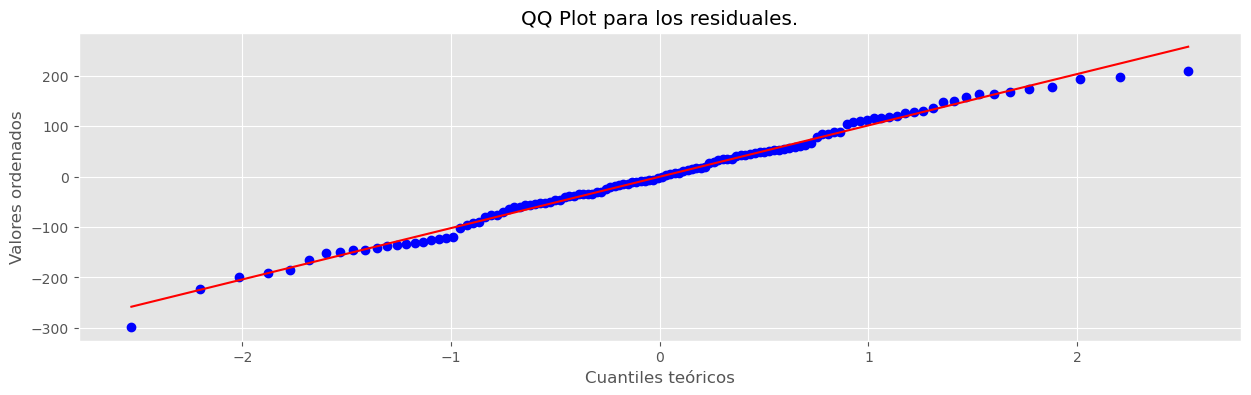

In [28]:
## QQ plot para los residuales observados. from scipy.stats import probplot
plt.figure(figsize = (15,4))
probplot(x=resid, dist="norm", plot=plt)              ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los residuales.")
plt.show()

Como ***conclusión*** notemos que se cumplen los supuestos del modelo, pero el poder explicativo del modelo solo llega al $7.67\%$, lo cual no es un buen indicador.

# ***Regresión lineal múltiple.***

En una regresión múltiple se tiene una variable objetivo (`Target`) $Y$ la cual es cuantitativa y es de interés para el investigador. Se quiere entonces construir una función $f(X)$ donde $X=(X_1, \ldots, X_p)$ es un conjunto de variables explicativas (`Features`) que se utilizaran para pronosticar y explicar las diferencias presentes en la variable target $Y$.

En un modelo de regresión lineal, se usan las funciones del tipo:

$$Y=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p +\epsilon $$ 

donde $\epsilon$ se conoce como el error o ruido del modelo.

Sobre este error se realizan varios supuestos para que el modelo tenga validez estadística.
1. ***Normalidad o gaussianidad:*** Campana de Gauss
2. ***Homocedasticidad:*** La variabilidad de mi modelo no depende de las X
3. ***Independencia.***


## ***Ejemplo 2***

In [45]:
df = pd.read_csv("kc_house_data.csv",)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [71]:
df[['sqft_living15','sqft_lot15']]

,sqft_living15,sqft_lot15
0,1340,5650
1,1690,7639
2,2720,8062
3,1360,5000
4,1800,7503
...,...,...
21608,1530,1509
21609,1830,7200
21610,1020,2007
21611,1410,1287


In [74]:
df.drop('date',axis=1).corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [76]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [78]:
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [79]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

## ***Exploración de datos***


Comencemos por revisar las columnas del conjunto de datos y lo que significan:

1. **id**: Identificación para la casa.
2. **date**: Fecha de venta de la casa.
3. **price**: Precio al que se vendió la casa.
4. **bedrooms**: Número de habitaciones.
5. **bathrooms**: Número de baños.
6. **sqft_living**: Pies cuadrados de la casa.
7. **sqft_lot**: Pies cuadrados del lote.
8. **floors**: Total de pisos (niveles) en casa.
9. **waterfront**: Si la casa tiene o no una vista de un paseo marítimo (whether or not the house has a view of a waterfront)
10. **view**: Un índice de 0 a 4 de qué tan buena es la vista desde la propiedad
11. **condition**: Condición de la casa (que tan buena está).
12. **grade**: Calificación general otorgada a la unidad de vivienda, basada en el sistema de calificación del condado de King.
13. **sqft_above**: Metros cuadrados de la casa aparte del sótano
14. **sqft_basement**: Metros cuadrados del sótano
15. **yr_built**: Año en que se construyó la casa
16. **yr_renovated**: Año en que fué renovada la casa.
17. **zipcode**: Código postal de la casa
18. **lat**: latitude coordinate of the house
19. **long**: longitude coordinate of the house
20. **sqft_lot15** :lotSize area in 2015(implies-- some renovations)
21. **sqft_living15:** Área de la sala de estar en 2015 (implica: algunas renovaciones) Esto podría o no haber afectado el área del tamaño del lote

In [75]:
##  Vamos a formar nuestro Dataset de trabajo
df_ml = df.copy()
df_ml = df_ml.drop(columns = ["id"])
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [66]:
### Notemos que variables como "waterfront", "zipcode","view" no estan en el tipo de feature que realmente
### es. Vamos a definir el tipo correcto de Dato
df_ml["waterfront"] = df_ml["waterfront"].astype("category")
df_ml["zipcode"] = df_ml["zipcode"].astype("category")
df_ml["view"] = df_ml["view"].astype("category")

In [82]:
###
X_train, X_test = train_test_split(df_ml,random_state=4)

In [85]:
X_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16192,20150323T000000,290000.0,3,1.0,910,7620,1.0,0,2,3,7,910,0,1971,0,98106,47.5278,-122.343,1660,7620
7534,20141010T000000,622000.0,3,2.5,1950,7481,2.0,0,0,3,8,1950,0,1987,0,98027,47.5640,-122.091,1980,8479
19897,20150120T000000,545000.0,3,2.5,1740,1279,3.0,0,0,3,8,1740,0,2008,0,98116,47.5890,-122.387,1740,1280
14294,20140624T000000,396500.0,3,2.5,2590,18980,1.0,0,0,4,10,2590,0,1976,0,98042,47.3839,-122.153,3110,14652
3234,20140715T000000,252000.0,2,1.0,940,15450,1.0,0,0,4,6,940,0,1926,0,98070,47.4408,-122.461,1370,34820


### ***Variable Target***

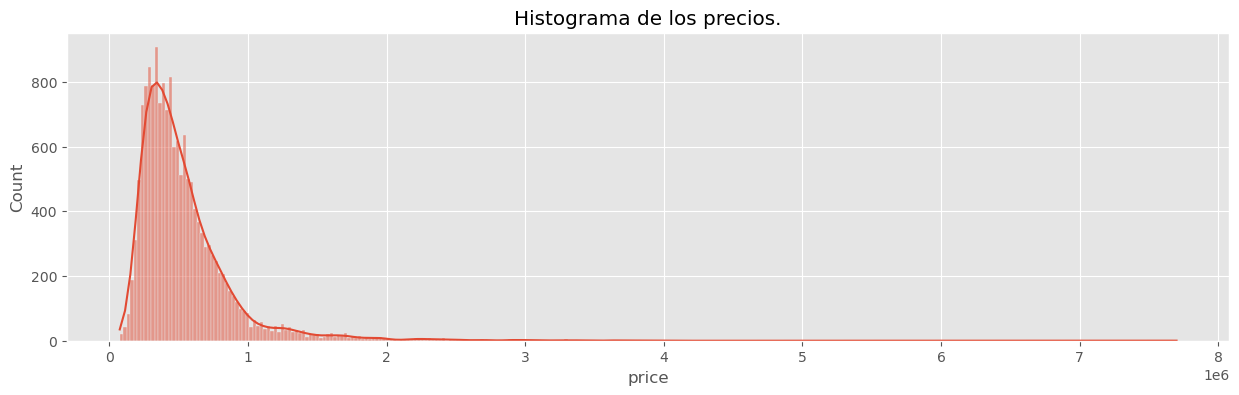

In [86]:
### Como distribuye la variable Target.
plt.figure(figsize=(15,4))
sns.histplot(X_train["price"], kde= True)
plt.title("Histograma de los precios.")
plt.show()

In [87]:
## Shapiro Test.
shapiro(X_train["price"]) 
## No hay normalidad...

ShapiroResult(statistic=0.7170594053154936, pvalue=4.658295311134672e-96)

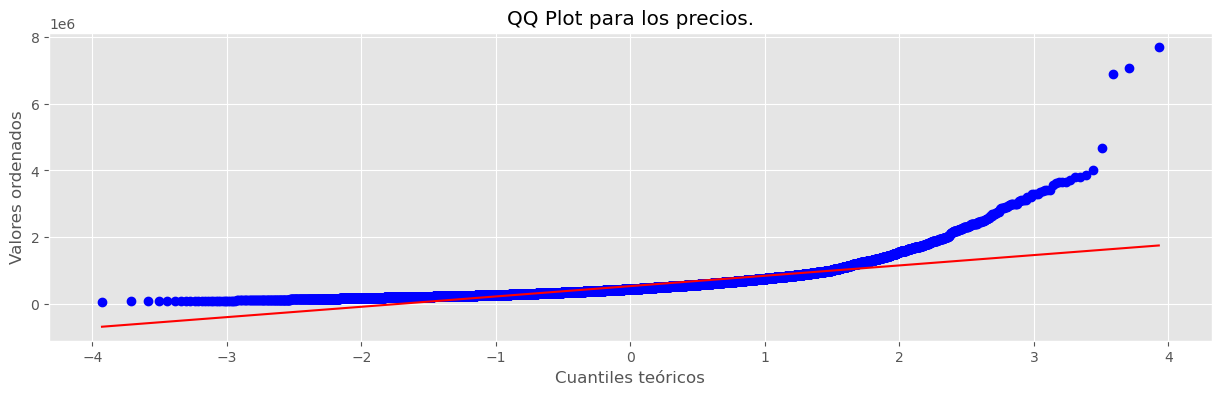

In [88]:
## QQ plot de la variable Target ----> "price"
plt.figure(figsize = (15,4))
probplot(x=X_train["price"], dist="norm", plot=plt) ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los precios.")
plt.show()

Notemos que la distribución se aleja bastante de la distribución normal. El algunos casos podemos buscar normalizar la variable Target. Recuerde que puede usar la transformación de [Box-Cox]().

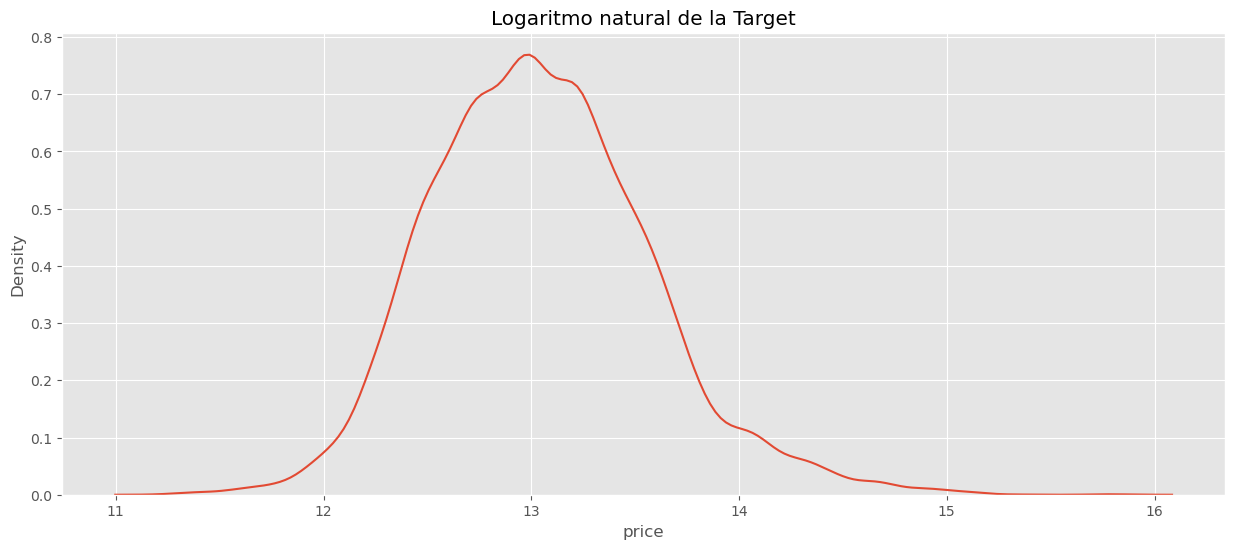

In [89]:
## Note que podemos hacer uso de la siguiente transformación: (Coincide con Box-Cox!!!)
sns.kdeplot(np.log(X_train["price"]))
plt.title("Logaritmo natural de la Target")
plt.show()

In [90]:
### Recodermos que nuestra variable objetivo es "price", vamos a considerar su logaritmo.
try:
  X_train["log_price"] = np.log(X_train["price"])
  #X_train = X_train.drop(columns = ["price"])
  ##
  X_test["log_price"] = np.log(X_test["price"])
  #X_train = X_train.drop(columns = ["price"])
except:
  print("OJO")

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16209 entries, 16192 to 17530
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16209 non-null  object 
 1   price          16209 non-null  float64
 2   bedrooms       16209 non-null  int64  
 3   bathrooms      16209 non-null  float64
 4   sqft_living    16209 non-null  int64  
 5   sqft_lot       16209 non-null  int64  
 6   floors         16209 non-null  float64
 7   waterfront     16209 non-null  int64  
 8   view           16209 non-null  int64  
 9   condition      16209 non-null  int64  
 10  grade          16209 non-null  int64  
 11  sqft_above     16209 non-null  int64  
 12  sqft_basement  16209 non-null  int64  
 13  yr_built       16209 non-null  int64  
 14  yr_renovated   16209 non-null  int64  
 15  zipcode        16209 non-null  int64  
 16  lat            16209 non-null  float64
 17  long           16209 non-null  float64
 18  sqft_li

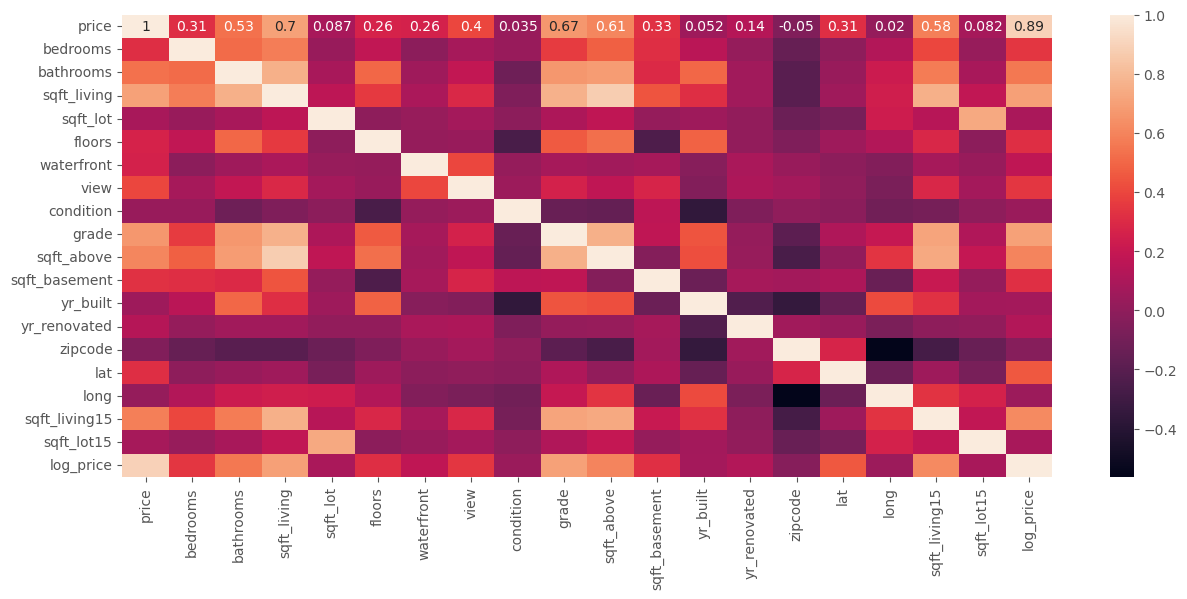

In [93]:
## Veamos las correlaciones. Tomemos un umbral pues tenemos bastantes variables
sns.heatmap(X_train.drop('date',axis=1).corr(), annot = True)
plt.show()

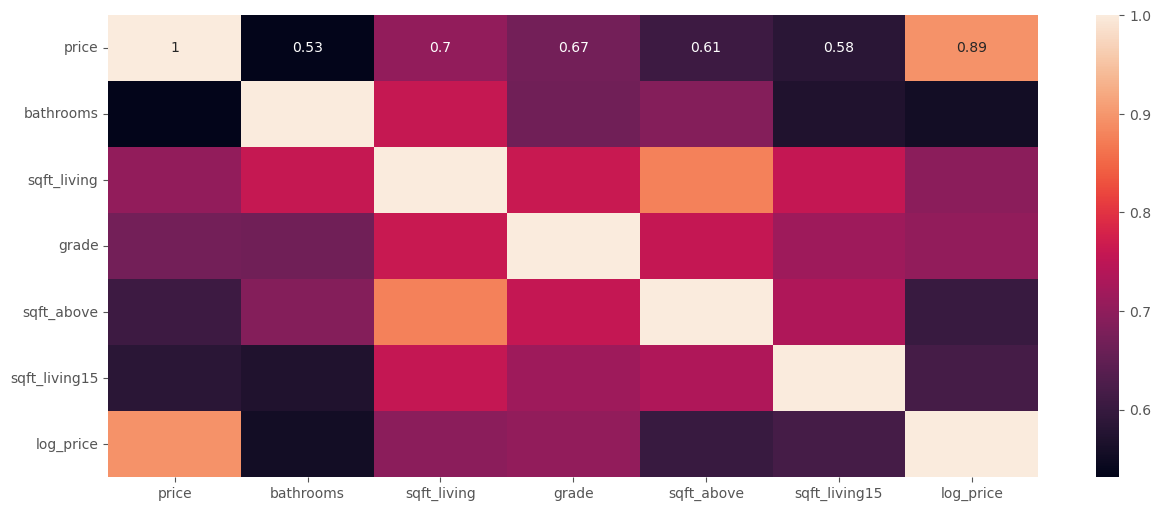

In [95]:
higt_corr = X_train.drop('date',axis=1).corr().loc["log_price"]
##
more_corre = higt_corr.index[(0.5<np.abs(higt_corr))&(np.abs(higt_corr)<1)].to_list()
more_corre.append("log_price")
temp = X_train[more_corre]
sns.heatmap(temp.corr(), annot = True, )
plt.show()

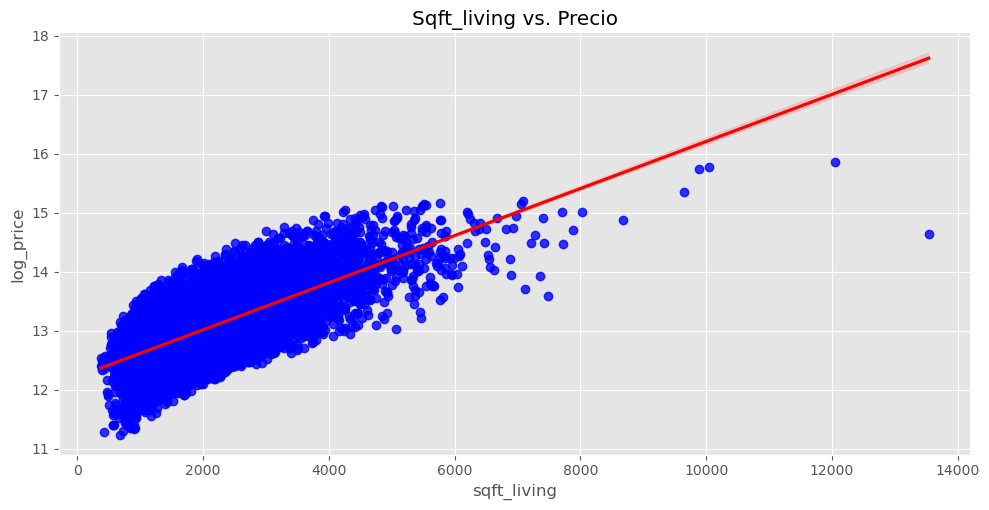

In [96]:
## Exploración con la más altamente relacionada
sns.lmplot(data = X_train,  x="sqft_living", y="log_price", line_kws={"color": "red"},
           scatter_kws={"color":"blue"}, aspect=2)
plt.title("Sqft_living vs. Precio")
plt.show()

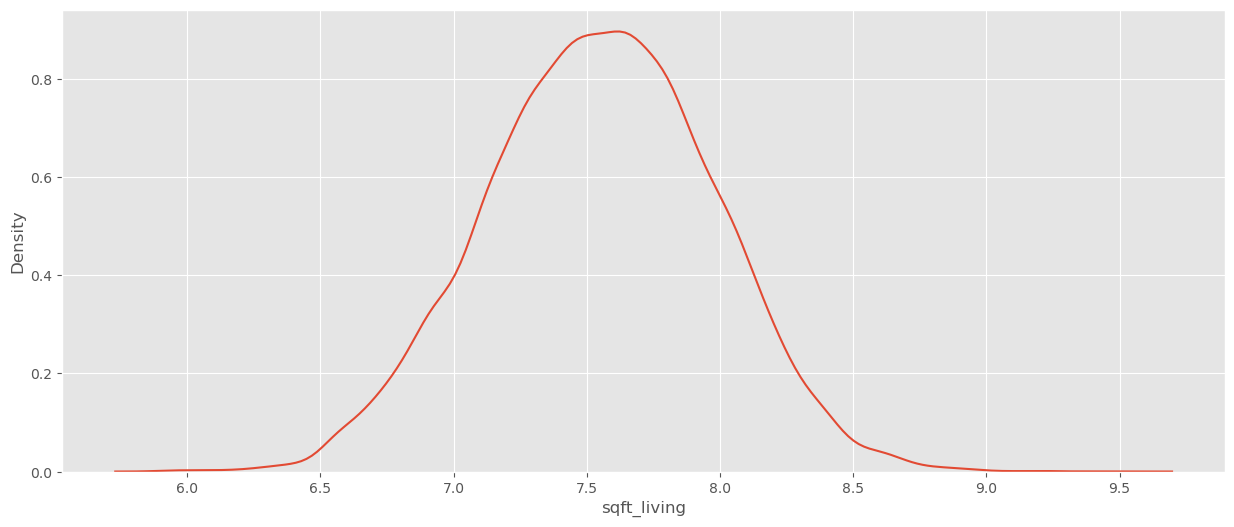

In [97]:
## Veamos el comportamiento del logaritmo de "sqft_living"
sns.kdeplot(x = np.log(X_train["sqft_living"]))
plt.show()

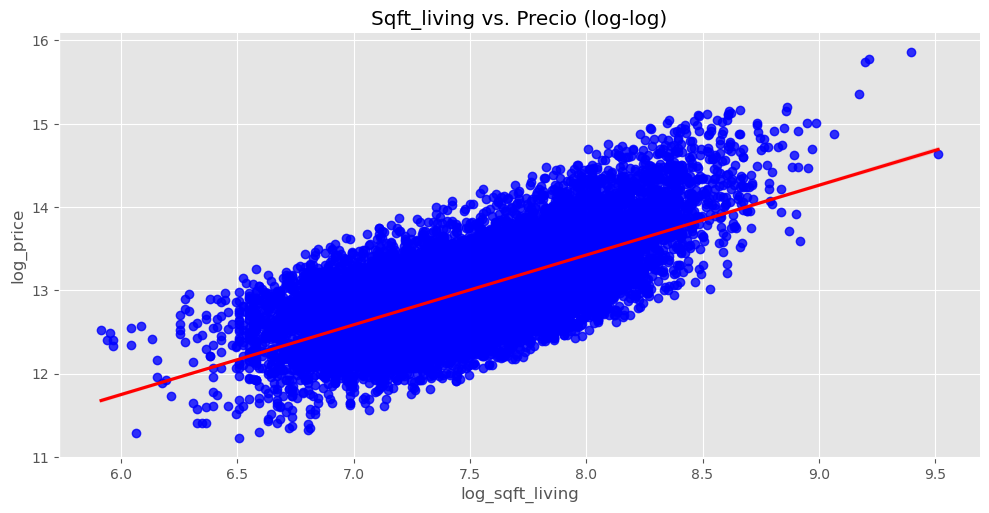

In [98]:
### Adicionamos esta "nueva" feature.
X_train["log_sqft_living"] = np.log(X_train["sqft_living"])
### Veamos nuevamente el ajuste por regresión
sns.lmplot(data = X_train,  x="log_sqft_living", y="log_price", line_kws={"color": "red"},
           scatter_kws={"color":"blue"}, aspect=2)
plt.title("Sqft_living vs. Precio (log-log)")
plt.show()

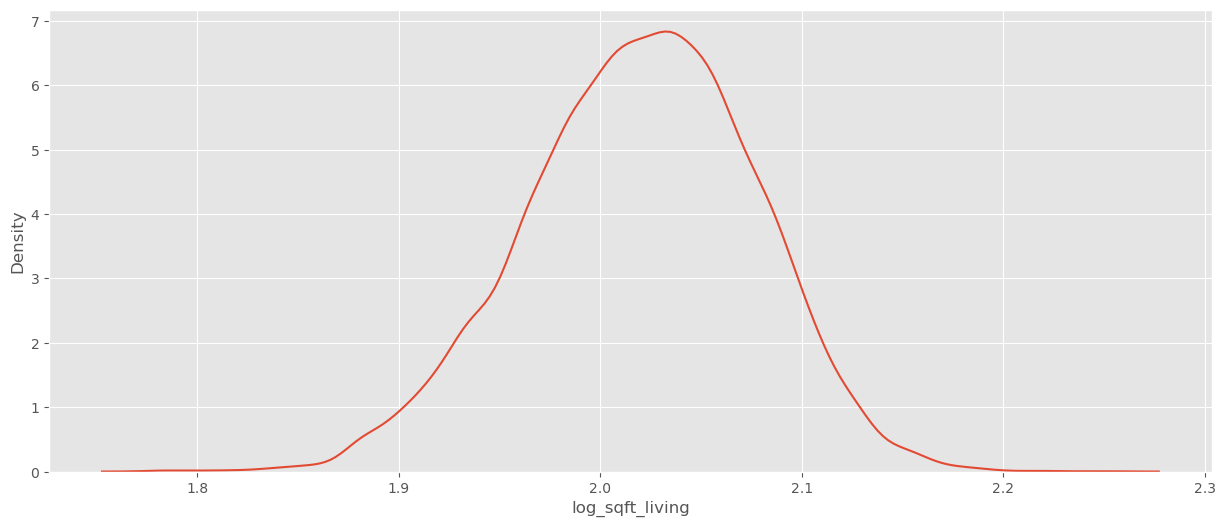

In [99]:
sns.kdeplot(x = np.log(X_train["log_sqft_living"]))
plt.show()

In [100]:
try:
  X_train["log_sqft_living"] = np.log(X_train["sqft_living"])
  X_train = X_train.drop(columns = ["sqft_living"])
  ##
  X_test["log_sqft_living"] = np.log(X_test["sqft_living"])
  X_test = X_test.drop(columns = ["sqft_living"])
except:
  print("OJO")

### ***Modelo Log-Log.***


El primer modelo de inspección es:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living) + \varepsilon
$$

In [101]:
formula = "log_price~log_sqft_living"
log_log_model = smf.ols(formula,data = X_train).fit()
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:36:38   Log-Likelihood:                -7691.6
No. Observations:               16209   AIC:                         1.539e+04
Df Residuals:                   16207   BIC:                         1.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7283      0.054    1

Tenemos que ser conscientes de cómo interpretamos los coeficientes aquí. En una regresión en la que tanto la variable independiente como la dependiente son transformaciones logarítmicas (una *log-log regression*), el coeficiente $\beta_1$ debe interpretarse como el *cambio porcentual* en la variable dependiente asociada con el 1\% de cambio en la variable independiente. Esta comparación de cambio de porcentaje frente a porcentaje se conoce como **elasticidad**. Así, en nuestro modelo:

---

***Un aumento del 1\% en la superficie habitable se asocia con un aumento del 0,8368\% en el precio.***



---

### ***Modelo Log-Level***

Ahora construyamos un modelo lineal donde la transformación logarítmica solo se aplica a los precios de la vivienda, es decir, un modelo de la forma:
$$
\log(price) = \beta_0 + \beta_1 sqft{\_}living + \varepsilon
$$

El plot y la tabla de salida están a continuación:


In [ ]:
#formula0 = "log_price~sqft_living"
#log_log_model = smf.ols(formula0,data = X_train).fit()
#print(log_log_model.summary())

La interpretación del coeficiente de regresión vuelve a ser diferente. Esta es una *log-level regression*; es decir, uno en el que la variable dependiente se ha transformado logarítmicamente y la variable independiente no. Interpretamos el coeficiente como una **semi-elasticidad**, donde un aumento absoluto en `sqft_living` (porque no se le ha aplicado la función logarítmica) corresponde a un aumento porcentual en `price`. Específicamente, aquí podemos decir que:

---

***Un aumento en el espacio habitable de 1 pie cuadrado conduce a un aumento del 0,04 % en el precio.***

---

***Podemos ver en estos gráficos que los puntos de datos del modelo log-log se agrupan más uniformemente alrededor de la línea de mejor ajuste en diferentes niveles de la variable independiente en comparación con el otro modelo, lo que sugiere que el modelo log-log es más lineal.***

## ***Corriendo regresiones con variables transformadas.*** PRIMERO "SERIO"

Por supuesto, no tiene sentido limitarnos a modelar los precios de la vivienda usando solo una variable independiente. Agreguemos varias variables más, algunas transformadas y otras no.

In [102]:
## Tenemos las más correlacionadas
print(more_corre)

['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'log_price']


In [103]:
## Vamos a construir una primera regresión "sería"
formula1 = """log_price ~ bathrooms+ log_sqft_living + grade + sqft_above"""
###
model1 = smf.ols(formula1,data = X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     4914.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:43:42   Log-Likelihood:                -6191.3
No. Observations:               16209   AIC:                         1.239e+04
Df Residuals:                   16204   BIC:                         1.243e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.8225      0.089     

Notemos que `bathrooms` no es significativo para la regresión. ¿Por qué?

In [105]:
formula1 = """log_price ~log_sqft_living + grade + sqft_above"""
temp = smf.ols(formula = formula1,data = X_train).fit()
print("R^2 CON la variable bathrooms",temp.rsquared_adj)
print("R^2 SIN la variable bathrooms",model1.rsquared_adj)

R^2 CON la variable bathrooms 0.5480169257952562
R^2 SIN la variable bathrooms 0.5480169257952562


***Como $R^{2}_{adj}$ penaliza el ingreso de features NO relevantes al modelo, no la vamos a considerar.***

In [106]:
try:
  X_train = X_train.drop(columns = ["bathrooms"])
  ###
  X_test = X_test.drop(columns = ["bathrooms"])
except:
  print("OJO")

¿En el contexto del problema que otras features considera importantes?. Podemos pensar en:

1. ***Ubicación del predio (`zipcode`).***
2. ***Cercania al mar (`waterfroont`).***
3. ***Vista del predio (`view`)***

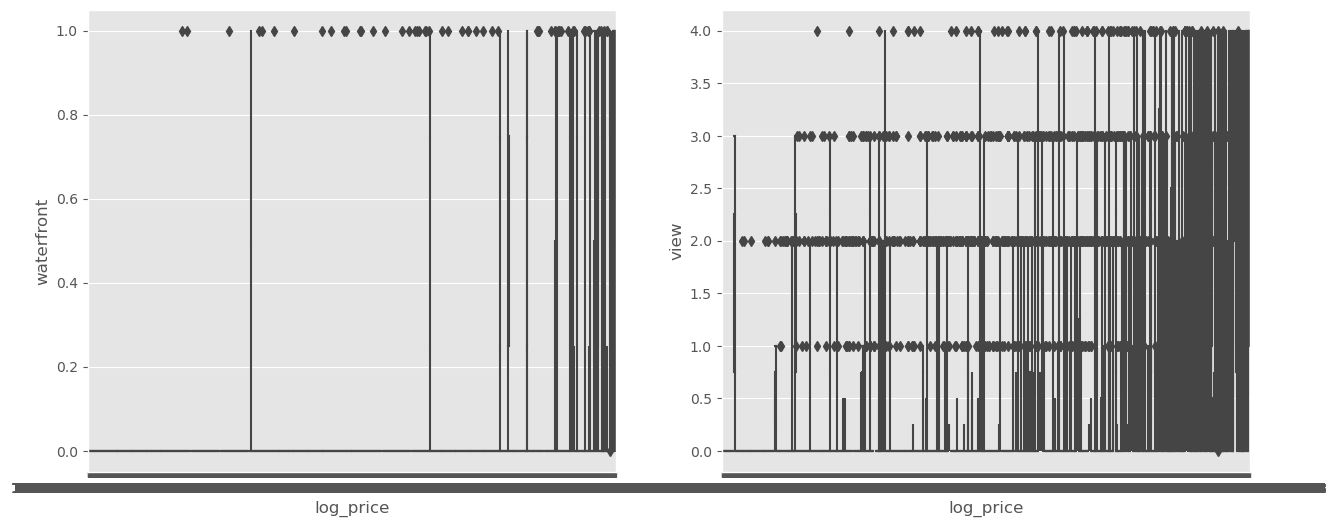

In [107]:
## Sirven para discriminar??
fig, ax = plt.subplots(1,2)
sns.boxplot(data = X_train, x = "log_price", y = "waterfront", ax = ax[0])
sns.boxplot(data = X_train, x = "log_price", y = "view", ax = ax[1])
plt.show()

In [ ]:
sns.boxplot(data = X_train, x = "log_price", y = "zipcode")
plt.show()

***Vamos a incorporarlas al modelo.***

In [ ]:
### Adicionamos al modelo "waterfront, "zipcode, "view""
formula2 = formula1 + "+waterfront+zipcode+view"
model2 = smf.ols(formula2,data = X_train).fit()
print(model2.summary())

Hasta este momento hemos tenido en cuenta las siguientes features para incluir en el modelo:

1. `log_sqft_living` (sqft_living).
2. `zipcode`.
3. `view`
4. `waterfront`
5. `grade`.
6. `sqft_above`

Además de una feature que no ingresará al modelo:

1. `bathrooms`

In [ ]:
list_columns_to_use = ["log_sqft_living","grade","sqft_above","waterfront","zipcode","view"]
### Features no analizadas aún.
df_no_ana = X_train[[col for col in X_train.columns if col not in list_columns_to_use ]]
###
sns.heatmap(df_no_ana.corr(),annot = True)
plt.show()

In [ ]:
## Veamos el comportamiento de "lat"
### Veamos nuevamente el ajuste por regresión
sns.lmplot(data = X_train,  x="lat", y="log_price", line_kws={"color": "red"}, height=6, aspect = 2.5,
           scatter_kws={"color":"blue","s": 1.5})
plt.title("lat vs. log_price")
plt.show()

Note que existe cierta relación lineal entre la variable `Target` y `lat`, además, puede observar lo siguiente:

In [ ]:
###
sns.lmplot(data = X_train,  x="lat", y="log_price", height=6, aspect = 2.5,
           scatter_kws={"color":"green","s": 1.5}, hue = "waterfront")
plt.title("lat vs. log_price")
plt.show()

***El plot anterior sugiere que podemos ingresar `lat` además del efecto de la interacción***

In [ ]:
### Adicionamos al modelo "lat" y su interacción con "waterfront".
formula3 = formula2 + "+lat"
model3 = smf.ols(formula3,data = X_train).fit()
print(model3.summary())

In [ ]:
print(model3.rsquared_adj)

In [ ]:
X_train["sqft_lot"].describe().to_frame().T

In [ ]:
sns.kdeplot(x=np.log(X_train["sqft_lot"]))
plt.show()

In [ ]:
### Consideremos variables que no estén incluidas
temp = pd.DataFrame()
temp["log_sqft_lot"] = np.log(X_train["sqft_lot"])
temp["log_price"] = X_train["log_price"]
sns.lmplot(data=temp, x = "log_sqft_lot", y = "log_price", height=6, aspect = 2.5,
           scatter_kws={"s": 1.5,"color":"blue"}) 
plt.show()

In [ ]:
### Recodermos que nuestra variable objetivo es "price", vamos a considerar su logaritmo.
try:
  X_train["log_sqft_lot"] = np.log(X_train["sqft_lot"])
  X_train = X_train.drop(columns = ["sqft_lot"])
  ###
  X_test["log_sqft_lot"] = np.log(X_test["sqft_lot"])
  X_test = X_test.drop(columns = ["sqft_lot"])

except:
  print("OJO")

In [ ]:
### Adicionamos al modelo np.log(sqft_lot)
formula4 = formula3 + "+log_sqft_lot+yr_built"
model4 = smf.ols(formula4,data = X_train).fit()
#print(model4.summary())

In [ ]:
print(model4.rsquared_adj)

## ***Validación del modelo***

In [ ]:
## Las variables a considerar en el modelo son:
## A CONSIDERAR: waterfront, zipcode,  log_sqft_living, view, grade, sqft_above, lat, np.log(sqft_lot)
## NO CONSIDERAR: date, bedrooms, floors, condition, sqft_above, sqft_basement, yr_renovated
## NO CONSIDERAR: long, renovated

## Vamos organizar el DataFrame

In [ ]:
list_to_drop = ["date","bedrooms","floors","condition","sqft_basement","yr_renovated", "long",]
###
X_test = X_test.drop(columns = list_to_drop)
###
X_train = X_train.drop(columns = list_to_drop)

In [ ]:
## Valores con predicción en el modelo
y_pred_train = np.exp(model4.predict(X_train))
y_pred_test = np.exp(model4.predict(X_test))
## Verdaderos valores.
y_train = X_train["price"]
y_test = X_test["price"]

In [ ]:
##
print("TRAIN R^2:",r2_score(y_train,y_pred_train))
print("TEST R^2:",r2_score(y_test,y_pred_test))
print()
##
print("TRAIN MSE:",mean_squared_error(y_train,y_pred_train))
print("TEST MSE:",mean_squared_error(y_test,y_pred_test))
print()
##
print("TRAIN MAE:",mean_absolute_error(y_train,y_pred_train))
print("TEST MAE:",mean_absolute_error(y_test,y_pred_test))
print()
##
print("TRAIN MAPE:",mean_absolute_percentage_error(y_train,y_pred_train))
print("TEST MAPE:",mean_absolute_percentage_error(y_test,y_pred_test))